<a href="https://colab.research.google.com/github/Desmyk/PYDATA/blob/main/TDFvisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd

In [99]:
# import dataset

url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv'
tdf = pd.read_csv(url)
tdf.head()


,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


In [100]:
# drop the columns we don't need and work with clean data.

tdf.drop(columns = ['winner_team', 'born', 'died', 'full_name', 'nickname', 'birth_town', 'birth_country'], inplace=True)
tdf

,edition,start_date,winner_name,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,nationality
0,1,1903-07-01,Maurice Garin,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,France
1,2,1904-07-02,Henri Cornet,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,France
2,3,1905-07-09,Louis Trousselier,2994.0,NaN,NaN,5,10,NaN,NaN,24,France
3,4,1906-07-04,René Pottier,4637.0,NaN,NaN,5,12,NaN,NaN,27,France
4,5,1907-07-08,Lucien Petit-Breton,4488.0,NaN,NaN,2,5,NaN,NaN,24,France
...,...,...,...,...,...,...,...,...,...,...,...,...
101,102,2015-07-04,Chris Froome,3360.3,84.770556,0.016944,1,16,1.86,69.0,30,Great Britain
102,103,2016-07-02,Chris Froome,3529.0,89.080000,0.067778,2,14,1.86,69.0,31,Great Britain
103,104,2017-07-01,Chris Froome,3540.0,86.348611,0.015000,0,15,1.86,69.0,32,Great Britain
104,105,2018-07-07,Geraint Thomas,3349.0,83.286944,0.016944,2,11,1.83,71.0,32,Great Britain


In [101]:
# remove rows with NaN values

tdf.dropna(axis=0, how='any', inplace=True)
tdf

,edition,start_date,winner_name,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,nationality
0,1,1903-07-01,Maurice Garin,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,France
31,32,1938-07-05,Gino Bartali,4694.0,148.486667,0.305000,2,8,1.72,66.0,23,Italy
33,34,1947-06-25,Jean Robic,4642.0,148.190278,0.050833,3,1,1.61,60.0,26,France
34,35,1948-06-30,Gino Bartali,4922.0,147.176667,0.440556,7,9,1.72,66.0,33,Italy
35,36,1949-06-30,Fausto Coppi,4808.0,149.680278,0.169444,3,5,1.77,68.0,29,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
101,102,2015-07-04,Chris Froome,3360.3,84.770556,0.016944,1,16,1.86,69.0,30,Great Britain
102,103,2016-07-02,Chris Froome,3529.0,89.080000,0.067778,2,14,1.86,69.0,31,Great Britain
103,104,2017-07-01,Chris Froome,3540.0,86.348611,0.015000,0,15,1.86,69.0,32,Great Britain
104,105,2018-07-07,Geraint Thomas,3349.0,83.286944,0.016944,2,11,1.83,71.0,32,Great Britain


In [102]:
# change to datetime info using 'start_date' column

tdf_d_t = pd.to_datetime(tdf['start_date'])

# insert new 'year' column using datetime list

tdf.insert(2, 'year', tdf_d_t.dt.year)

# drop start_date column

tdf.drop(columns = 'start_date', inplace=True)

tdf

,edition,year,winner_name,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,nationality
0,1,1903,Maurice Garin,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,France
31,32,1938,Gino Bartali,4694.0,148.486667,0.305000,2,8,1.72,66.0,23,Italy
33,34,1947,Jean Robic,4642.0,148.190278,0.050833,3,1,1.61,60.0,26,France
34,35,1948,Gino Bartali,4922.0,147.176667,0.440556,7,9,1.72,66.0,33,Italy
35,36,1949,Fausto Coppi,4808.0,149.680278,0.169444,3,5,1.77,68.0,29,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
101,102,2015,Chris Froome,3360.3,84.770556,0.016944,1,16,1.86,69.0,30,Great Britain
102,103,2016,Chris Froome,3529.0,89.080000,0.067778,2,14,1.86,69.0,31,Great Britain
103,104,2017,Chris Froome,3540.0,86.348611,0.015000,0,15,1.86,69.0,32,Great Britain
104,105,2018,Geraint Thomas,3349.0,83.286944,0.016944,2,11,1.83,71.0,32,Great Britain


In [103]:
# change time_margin from hours to minutes & rename column


tdf['time_margin'] = tdf['time_margin']*60
tdf = tdf.rename(columns={'time_margin': 'win_margin'})

tdf

,edition,year,winner_name,distance,time_overall,win_margin,stage_wins,stages_led,height,weight,age,nationality
0,1,1903,Maurice Garin,2428.0,94.553889,179.350000,3,6,1.62,60.0,32,France
31,32,1938,Gino Bartali,4694.0,148.486667,18.300000,2,8,1.72,66.0,23,Italy
33,34,1947,Jean Robic,4642.0,148.190278,3.050000,3,1,1.61,60.0,26,France
34,35,1948,Gino Bartali,4922.0,147.176667,26.433333,7,9,1.72,66.0,33,Italy
35,36,1949,Fausto Coppi,4808.0,149.680278,10.166667,3,5,1.77,68.0,29,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
101,102,2015,Chris Froome,3360.3,84.770556,1.016667,1,16,1.86,69.0,30,Great Britain
102,103,2016,Chris Froome,3529.0,89.080000,4.066667,2,14,1.86,69.0,31,Great Britain
103,104,2017,Chris Froome,3540.0,86.348611,0.900000,0,15,1.86,69.0,32,Great Britain
104,105,2018,Geraint Thomas,3349.0,83.286944,1.016667,2,11,1.83,71.0,32,Great Britain


In [36]:
tdf.info()
tdf.head()
tdf["win_margin"].describe()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 0 to 105
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edition       65 non-null     int64  
 1   year          65 non-null     int32  
 2   winner_name   65 non-null     object 
 3   distance      65 non-null     float64
 4   time_overall  65 non-null     float64
 5   win_margin    65 non-null     float64
 6   stage_wins    65 non-null     int64  
 7   stages_led    65 non-null     int64  
 8   height        65 non-null     float64
 9   weight        65 non-null     float64
 10  age           65 non-null     int64  
 11  nationality   65 non-null     object 
dtypes: float64(5), int32(1), int64(4), object(2)
memory usage: 8.4+ KB


count     65.000000
mean       9.022308
std       22.287359
min        0.133333
25%        2.033333
50%        4.066667
75%        9.150000
max      179.350000
Name: win_margin, dtype: float64

In [44]:
# Group by year and get the minimum winning time and runner-up time

grouped_df = tdf.groupby("year").agg(
    winning_time=pd.NamedAgg(column="win_margin", aggfunc="min"),
    runner_up_time=pd.NamedAgg(column="win_margin", aggfunc=lambda x: pd.Timedelta(seconds=x.min()) + pd.Timedelta(seconds=1)),
)
grouped_df

,winning_time,runner_up_time
year,,
1903,179.350000,0 days 00:03:00.350000
1938,18.300000,0 days 00:00:19.300000
1947,3.050000,0 days 00:00:04.049999999
1948,26.433333,0 days 00:00:27.433333333
1949,10.166667,0 days 00:00:11.166666666
...,...,...
2015,1.016667,0 days 00:00:02.016666666
2016,4.066667,0 days 00:00:05.066666666
2017,0.900000,0 days 00:00:01.899999999


In [106]:
# Calculate the difference between winning time and runner-up time

# grouped_df["time_difference"] = grouped_df["runner_up_time"] - grouped_df["winning_time"]

# Calculate the percentage difference
# grouped_df["percentage_difference"] = (grouped_df["time_difference"] / grouped_df["winning_time"]) * 100

# Print the results
# print(grouped_df[["winning_time", "runner_up_time", "time_difference", "percentage_difference"]])

In [92]:
tdf.info()
tdf.head()
tdf.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 35 to 70
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   edition        4 non-null      int64  
 1   start_date     4 non-null      object 
 2   winner_name    4 non-null      object 
 3   winner_team    4 non-null      object 
 4   distance       4 non-null      float64
 5   time_overall   4 non-null      float64
 6   win_margin     4 non-null      float64
 7   stage_wins     4 non-null      int64  
 8   stages_led     4 non-null      int64  
 9   height         4 non-null      float64
 10  weight         4 non-null      float64
 11  age            4 non-null      int64  
 12  born           4 non-null      object 
 13  died           4 non-null      object 
 14  full_name      4 non-null      object 
 15  nickname       4 non-null      object 
 16  birth_town     4 non-null      object 
 17  birth_country  4 non-null      object 
 18  nationality    4 

,edition,distance,time_overall,win_margin,stage_wins,stages_led,height,weight,age
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000
mean,54.000000,4384.000000,129.707014,13.216667,3.500000,8.000000,1.755000,67.50000,26.000000
std,19.096247,549.656256,24.557971,10.565510,1.914854,4.082483,0.017321,0.57735,4.082483
min,36.000000,3809.000000,105.131111,4.066667,1.000000,5.000000,1.740000,67.00000,22.000000
25%,38.250000,3968.000000,110.328611,8.641667,2.500000,5.750000,1.740000,67.00000,22.750000
50%,54.500000,4414.500000,130.870694,10.166667,4.000000,6.500000,1.755000,67.50000,26.000000
75%,70.250000,4830.500000,150.249097,14.741667,5.000000,8.750000,1.770000,68.00000,29.250000
max,71.000000,4898.000000,151.955556,28.466667,5.000000,14.000000,1.770000,68.00000,30.000000


<ipython-input-104-cb4d584484c1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="age", y="stages_led", data=tdf, palette=palette)


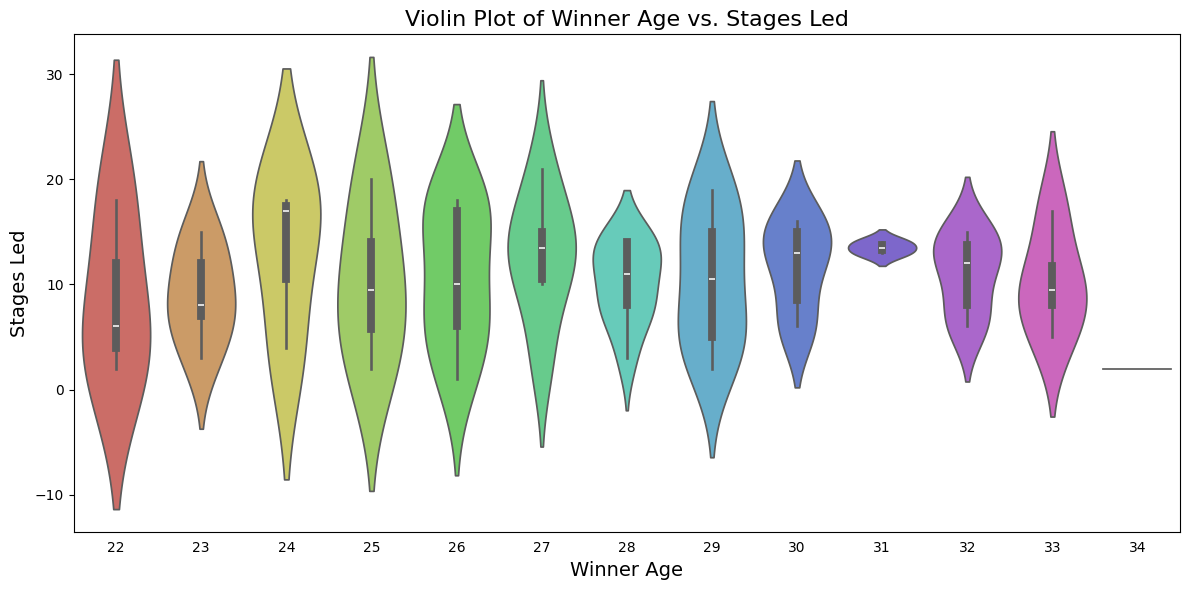

In [104]:
# What relationship is there between a winners age and the number of stages led.

palette = sns.color_palette("hls", len(tdf["age"].unique()))

plt.figure(figsize=(12, 6))

sns.violinplot(x="age", y="stages_led", data=tdf, palette=palette)

# Add title and labels
plt.title("Violin Plot of Winner Age vs. Stages Led", fontsize=16)
plt.xlabel("Winner Age", fontsize=14)
plt.ylabel("Stages Led", fontsize=14)

# Improve visuals
plt.tick_params(bottom=False)
plt.tight_layout()

# Show plot
plt.show()

In [129]:

# Sort by the most recent year
df_sorted = tdf.sort_values(by="year", ascending=False)

# Get the nationality of the winner in the most recent year
winner_nationality = df_sorted.iloc[0]["nationality"]

# Display the top 5 rows
print(df_sorted.head())

# Print the winner's nationality
print(f"\nWinner's nationality: {winner_nationality}")



     edition  year     winner_name  distance  time_overall  win_margin  \
105      106  2019     Egan Bernal    3349.0     82.950000    1.016667   
104      105  2018  Geraint Thomas    3349.0     83.286944    1.016667   
103      104  2017    Chris Froome    3540.0     86.348611    0.900000   
102      103  2016    Chris Froome    3529.0     89.080000    4.066667   
101      102  2015    Chris Froome    3360.3     84.770556    1.016667   

     stage_wins  stages_led  height  weight  age     nationality  
105           0           2    1.75    60.0   22        Colombia  
104           2          11    1.83    71.0   32   Great Britain  
103           0          15    1.86    69.0   32   Great Britain  
102           2          14    1.86    69.0   31   Great Britain  
101           1          16    1.86    69.0   30   Great Britain  

Winner's nationality:  Colombia


<Axes: >

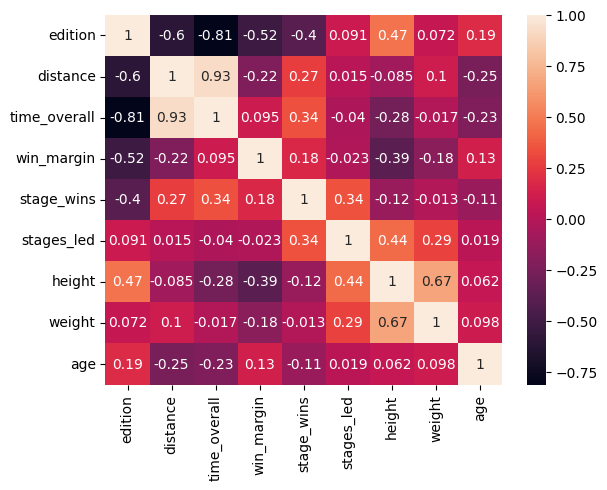

In [107]:
# correlation between numeric columns

# Select the numeric columns
numeric_columns = tdf.select_dtypes(include=["int64", "float64"])

# Handle missing data
numeric_columns.dropna(inplace=True)

# Calculate the correlations
correlations = numeric_columns.corr()

# Create a heatmap of the correlations
sns.heatmap(correlations, annot=True)